<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Qiskit Exploration #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2022
University of Illinois Board of Trustees. All Rights Reserved.

# imports

In [1]:
import qiskit
from qiskit import IBMQ
import numpy
import pandas

## conveniences

In [17]:
def find_backend(verbose=False):
    backends={}
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = numpy.inf

        if qubit_count>=2:
            backends[backend.name()]=backend.status().pending_jobs
            if verbose:
                print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
    backends_series=pandas.Series(backends)
    return backends_series.idxmin()

# main

In [18]:
tokenfile="../token.txt"
IBMQ.save_account(open(tokenfile, "r").read())
IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")

configrc.store_credentials:WARNING:2022-05-18 20:47:53,325: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-05-18 20:47:53,696: Credentials are already in use. The existing account in the session will be replaced.


In [19]:
circuit = qiskit.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# initialized to 0, 0
circuit.x(0)
#circuit.x(1)
# flipped first qubit, now it's 1, 0
circuit.cx(0, 1)
# flipped to 1, 1

circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [20]:
bestbackend=find_backend()
print("\nbest backend seems to be {0:s}".format(bestbackend))


best backend seems to be ibmq_qasm_simulator


In [21]:
#from qiskit.tools.monitor import job_monitor

backend = provider.get_backend(bestbackend)
job = qiskit.execute(circuit, backend = backend, shots = 10)
#executes the circuit we created above with the chosen backend and 500 shots (could be more or less)

qiskit.tools.monitor.job_monitor(job)
# monitors where we are in the queue and if the job has run

Job Status: job has successfully run


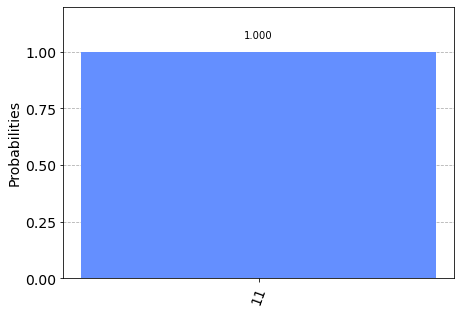

In [22]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])